dataset link:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download&select=creditcard.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/

cp: cannot stat '/content/kaggle.json': No such file or directory


In [ ]:
! chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip -q /content/creditcardfraud.zip

unzip:  cannot find or open /content/creditcardfraud.zip, /content/creditcardfraud.zip.zip or /content/creditcardfraud.zip.ZIP.


In [ ]:
dataset = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
dataset.shape

(1986, 31)

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,...,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,761.035750,-0.284195,0.266886,0.848005,0.151216,-0.077457,0.050205,0.138347,-0.058795,0.012145,...,-0.011611,-0.144319,-0.043045,0.013864,0.108372,0.049408,0.027197,-0.002018,68.602469,0.001008
std,451.034025,1.353508,1.142026,1.012645,1.264932,1.272512,1.274204,1.140750,0.966493,0.900828,...,0.653200,0.588201,0.352890,0.601370,0.407874,0.454251,0.369485,0.272864,241.677019,0.031734
min,0.000000,-11.140706,-12.114213,-12.389545,-4.657545,-32.092129,-3.498447,-4.925568,-12.258158,-3.110515,...,-4.709977,-2.776923,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.738566,0.000000,0.000000
25%,366.000000,-1.045512,-0.204111,0.280517,-0.670513,-0.576269,-0.691393,-0.286991,-0.172322,-0.479310,...,-0.226941,-0.547474,-0.181176,-0.350802,-0.151028,-0.281097,-0.049467,-0.021053,4.950000,0.000000
50%,750.000000,-0.437621,0.314294,0.864505,0.190698,-0.154843,-0.198063,0.117535,0.037598,-0.034097,...,-0.087329,-0.152603,-0.057041,0.093137,0.131713,0.036992,0.023011,0.022722,15.090000,0.000000
75%,1161.000000,1.095047,0.926126,1.486942,1.002546,0.376901,0.389714,0.569262,0.279513,0.449706,...,0.083530,0.252698,0.064859,0.428755,0.383339,0.303731,0.140481,0.090920,63.650000,0.000000
max,1526.000000,1.685314,6.118940,4.017561,6.013346,7.672544,21.393069,34.303177,3.877662,6.450992,...,6.765928,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.isnull().values.sum()

17

In [ ]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

0

<Axes: ylabel='count'>

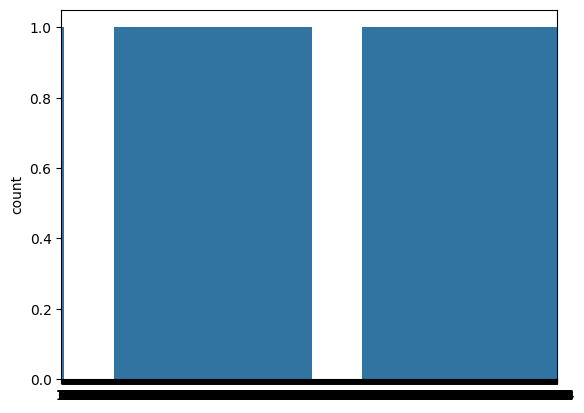

In [ ]:
sns.countplot(dataset['Class'])

In [ ]:
(dataset.Class == 0).sum()

1983

In [ ]:
(dataset.Class == 1).sum()

2

In [ ]:
dataset_2 = dataset.drop(columns='Class')

<Axes: title={'center': 'Correlated with Class'}>

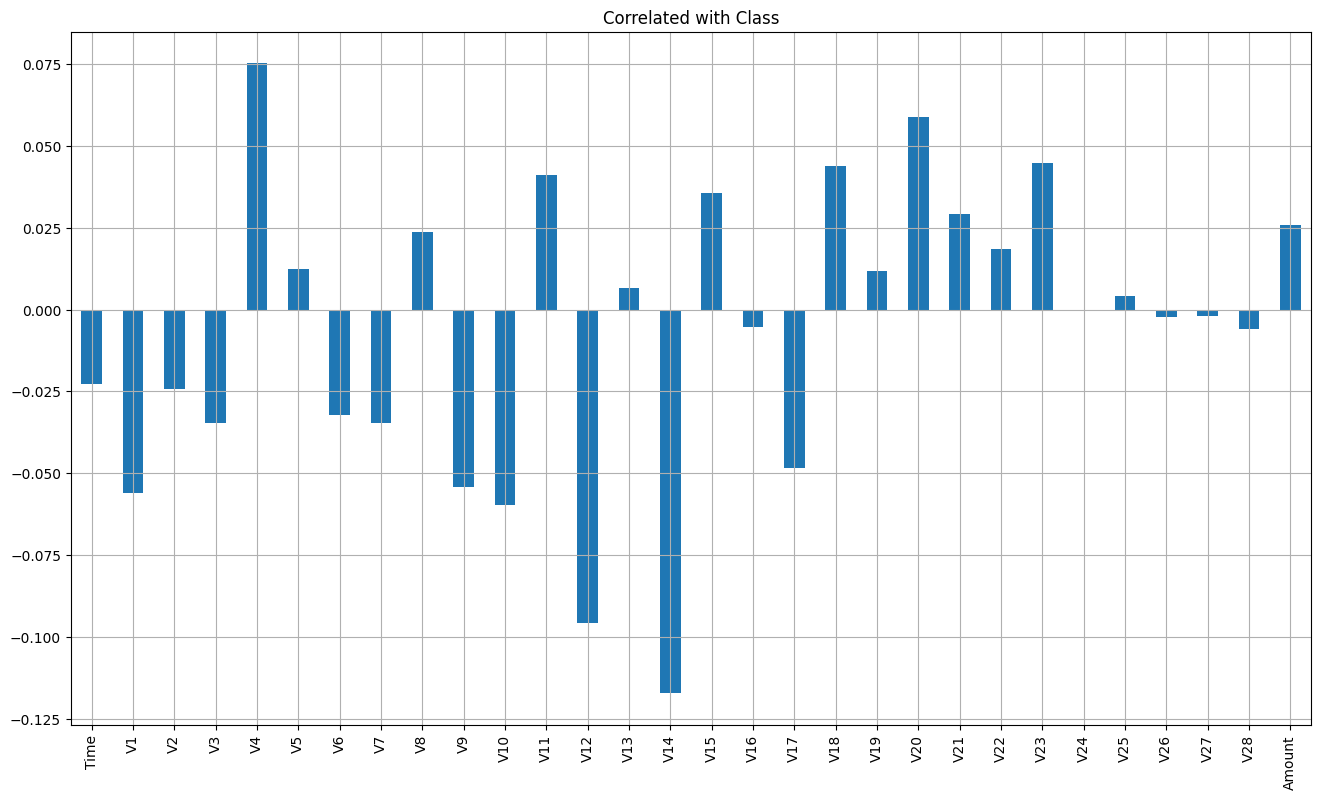

In [ ]:
dataset_2.corrwith(dataset['Class']).plot.bar(
    figsize=(16, 9), title='Correlated with Class', grid=True
)

In [ ]:
corr = dataset.corr()

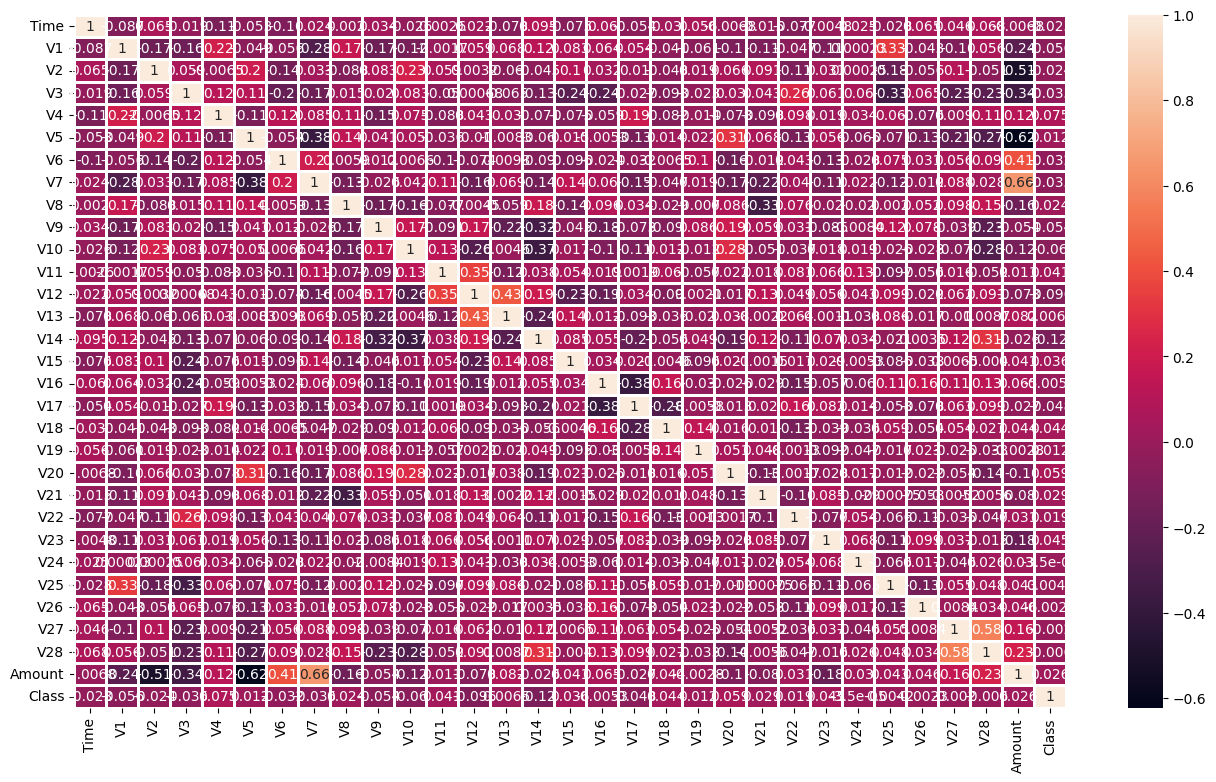

In [ ]:
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, annot=True, linewidths=2)

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
x = dataset.drop(columns='Class')

In [ ]:
y = dataset['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
x_train.shape

(1588, 30)

In [ ]:
x_test.shape

(398, 30)

In [ ]:
y_test.shape

(398,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-1.19089075, -0.49606366,  0.41741854, ...,  1.27723125,
         0.75018898, -0.16815315],
       [ 1.29379295,  1.06883741, -0.01036495, ..., -0.16001814,
         0.05794018, -0.26292436],
       [ 0.15302622, -0.60046133,  0.20392055, ..., -0.60976414,
         0.28791253, -0.06193358],
       ...,
       [ 1.15091806, -0.51853676,  0.90183016, ...,  0.56798725,
         0.24329965, -0.23665378],
       [-0.77566059, -1.73872387,  1.39090643, ...,  1.46529074,
         0.61102356, -0.1567427 ],
       [-0.55241857,  1.1495621 , -0.50720017, ...,  0.0889422 ,
         0.05750163, -0.23252176]])

In [ ]:
x_test

array([[ 1.09957239, -0.28893271,  0.59370916, ..., -0.31971757,
        -0.51897407, -0.2541675 ],
       [ 0.77363904, -0.85589297,  0.15673318, ...,  0.33278318,
        -0.24494913, -0.26663939],
       [-0.90290854,  1.13560415,  0.03234465, ..., -0.15726239,
         0.09917958, -0.26705639],
       ...,
       [ 0.95223266, -0.87008239,  2.0625329 , ...,  3.41797311,
         2.5170991 , -0.26705639],
       [-1.48557022,  0.98062011, -0.44497619, ..., -0.20442944,
         0.09862859,  0.04947945],
       [ 0.76694178, -0.10400997,  0.18809365, ..., -0.20151869,
        -0.0980994 ,  0.3361055 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier_lr.predict(x_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

NameError: name 'y_pred' is not defined

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56852     9]
 [   37    64]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = LogisticRegression(random_state=0)
classifier_rf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier_rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc*100)

99.91924440855307


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56852     9]
 [   37    64]]


In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred = classifier_xgb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc*100)

99.94557775359011


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56851    10]
 [   21    80]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc*100)

99.94908886626172


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56854     7]
 [   22    79]]


In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.shape

(284807, 31)

In [ ]:
obs = [[0.0, -1.359807,	-0.072781,	2.536347,	1.378155,	-0.338321,	0.462388,	0.239599,	0.098698,	0.363787,	0.090794,	-0.551600,	-0.617801,	-0.991390,	-0.311169,	1.468177,	-0.470401,	0.207971,	0.025791,	0.403993,	0.251412,	-0.018307,	0.277838,	-0.110474,	0.066928,	0.128539,	-0.189115,	0.133558,	-0.021053,	149.62
]]

In [ ]:
classifier.predict(sc.transform(obs))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])